In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import splitfolders
from PIL import Image

import torch
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
from torch import nn
from torch.optim import Adam
from torchvision import models

from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [16]:
device = "cuda" if torch.cuda.is_available()else "cpu"
device

'cuda'

In [17]:
splitfolders.ratio("/content/drive/MyDrive/Colab Notebooks/Data/PlantVillage",
            output="splitted_data",
            seed=42,
            ratio=(.7, .2, .1),
            group_prefix=None,
            move=False)

Copying files: 32060 files [09:51, 54.21 files/s] 


In [18]:
#----------------------
train_transform = transforms.Compose([
    transforms.Resize(size=(256, 256)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.GaussianBlur(kernel_size=(3, 7), sigma=(0.1, 2)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                        std=[0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.Resize(size=(256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                        std=[0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.Resize(size=(256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                        std=[0.229, 0.224, 0.225])
])

# -------- Transformation for the Whole Dataset for Visualization Purposes --------
data_transform = transforms.Compose([
    transforms.Resize(size=(256, 256)),
    transforms.ToTensor(),
])

In [19]:
train = datasets.ImageFolder(root="/content/splitted_data/train",
                              transform=train_transform)

val = datasets.ImageFolder(root="/content/splitted_data/val",
                              transform=val_transform)

test = datasets.ImageFolder(root="/content/splitted_data/test",
                              transform=test_transform)

# -------- Getting the Whole Dataset for Visualization Purposes --------
data = datasets.ImageFolder(root="/content/drive/MyDrive/Colab Notebooks/Data/PlantVillage",
                              transform=data_transform)

In [20]:
print("Dataset Labels:\n", train.class_to_idx, "\n")

for name, dataset in zip(["TRAIN", "VALIDATION", "TEST"], [train, val, test]):
    images_per_class = pd.Series(dataset.targets).value_counts()
    print(f"Images per Class in {name}:")
    print(images_per_class, "\n")

Dataset Labels:
 {'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Corn___Blight': 4, 'Corn___Common_Rust': 5, 'Corn___Gray_Leaf_Spot': 6, 'Corn___Healthy': 7, 'Grape___Black_rot': 8, 'Grape___Esca_(Black_Measles)': 9, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 10, 'Grape___healthy': 11, 'Pepper__bell___Bacterial_spot': 12, 'Pepper__bell___healthy': 13, 'Potato___Early_blight': 14, 'Potato___Late_blight': 15, 'Potato___healthy': 16, 'Tomato_Bacterial_spot': 17, 'Tomato_Early_blight': 18, 'Tomato_Late_blight': 19, 'Tomato_Leaf_Mold': 20, 'Tomato_Septoria_leaf_spot': 21, 'Tomato_Spider_mites_Two_spotted_spider_mite': 22, 'Tomato__Target_Spot': 23, 'Tomato__Tomato_YellowLeaf__Curl_Virus': 24, 'Tomato__Tomato_mosaic_virus': 25, 'Tomato_healthy': 26} 

Images per Class in TRAIN:
24    2245
17    1488
19    1336
21    1239
22    1173
3     1151
26    1113
13    1034
23     982
9      968
5      914
8      826
7      813
4      802
10  

{0: 'Apple___Apple_scab', 1: 'Apple___Black_rot', 2: 'Apple___Cedar_apple_rust', 3: 'Apple___healthy', 4: 'Corn___Blight', 5: 'Corn___Common_Rust', 6: 'Corn___Gray_Leaf_Spot', 7: 'Corn___Healthy', 8: 'Grape___Black_rot', 9: 'Grape___Esca_(Black_Measles)', 10: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 11: 'Grape___healthy', 12: 'Pepper__bell___Bacterial_spot', 13: 'Pepper__bell___healthy', 14: 'Potato___Early_blight', 15: 'Potato___Late_blight', 16: 'Potato___healthy', 17: 'Tomato_Bacterial_spot', 18: 'Tomato_Early_blight', 19: 'Tomato_Late_blight', 20: 'Tomato_Leaf_Mold', 21: 'Tomato_Septoria_leaf_spot', 22: 'Tomato_Spider_mites_Two_spotted_spider_mite', 23: 'Tomato__Target_Spot', 24: 'Tomato__Tomato_YellowLeaf__Curl_Virus', 25: 'Tomato__Tomato_mosaic_virus', 26: 'Tomato_healthy'}


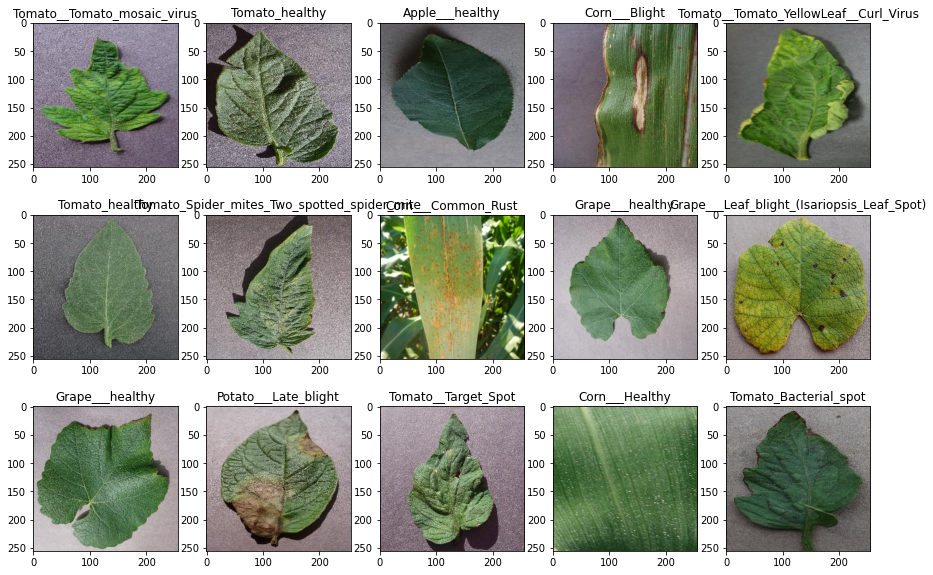

In [21]:
labels_for_viz = {v: k for k, v in data.class_to_idx.items()}
print(labels_for_viz)
fig, ax = plt.subplots(3, 5, figsize=(15, 10))
ax = ax.flatten()
for i in range(15):
    sample = random.randint(0, len(data))
    ax[i].imshow(data[sample][0].permute(1, 2, 0))
    ax[i].title.set_text(labels_for_viz[data[sample][1]])

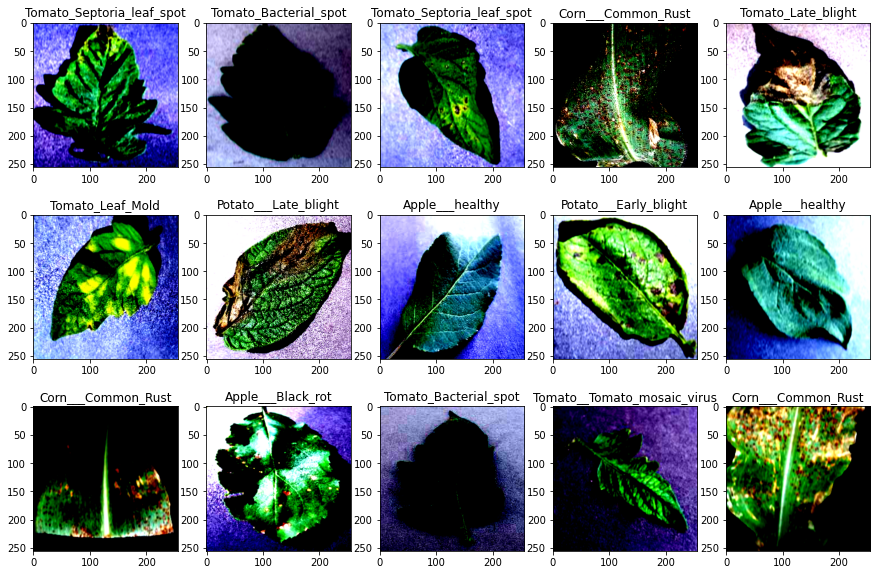

In [22]:
fig, ax = plt.subplots(3, 5, figsize=(15, 10))
ax = ax.flatten()
for i in range(15):
    sample = random.randint(0, len(train))
    ax[i].imshow(train[sample][0].permute(1, 2, 0))
    ax[i].title.set_text(labels_for_viz[train[sample][1]])

In [23]:
train_dataloader = DataLoader(dataset=train,
                             batch_size=32,
                             num_workers=2,
                             shuffle=True)

val_dataloader = DataLoader(dataset=val,
                             batch_size=32,
                             num_workers=2,
                             shuffle=True)

test_dataloader = DataLoader(dataset=test,
                             batch_size=32,
                             num_workers=2,
                             shuffle=False)

In [24]:
img, label = next(iter(train_dataloader))
print("Batch and Image Shape:", img.shape, "--> [batch_size, color_channels, height, width]")
print("\nLabels:", label)

Batch and Image Shape: torch.Size([32, 3, 256, 256]) --> [batch_size, color_channels, height, width]

Labels: tensor([ 9, 22, 15, 22, 26, 13, 22, 26, 22, 22, 18,  3, 25, 22, 17, 21, 21,  0,
         1,  4,  9, 19,  5, 21,  3, 25,  5, 24,  8, 23, 22, 23])


In [25]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=131072, out_features=128), # in_features are selected based on the output that Flatten layer yields
            nn.ReLU(),
            nn.Linear(in_features=128, out_features=64), 
            nn.ReLU(),
            nn.Linear(in_features=64, out_features=32),
            nn.ReLU(),
            nn.Linear(in_features=32, out_features=27)
        )
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.fc(x)
        return x

In [26]:
model = NeuralNetwork()
model = model.to(device)

In [27]:
print(model)

NeuralNetwork(
  (conv1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=131072, out_features=128, bias=True)
    (2): ReLU()
    (3): Linear(in_features=128, out_features=64, bias=True)
    (4): ReLU()
    (5): Linear(in_features=64, out_features=32, bias=True)
    (6): ReLU()
    (7): Linear(in_features=32, out_features=27, bias=True)
  )
)


In [28]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=10e-3)

In [29]:
def train_and_validate_model(num_epochs):
    val_best_accuracy = 0.0
    train_loss_history = []
    val_loss_history = []
    train_accuracy_history = []
    val_accuracy_history = []
    
    print("Training begins...")
    for epoch in range(1, num_epochs+1):
        running_train_loss = 0.0
        running_train_accuracy = 0.0
        train_total = 0
        running_val_accuracy = 0.0
        running_val_loss = 0.0
        val_total = 0

         # TRAINING LOOP
        for data in train_dataloader:
            inputs, outputs = data
            inputs, outputs = inputs.to(device), outputs.to(device)
            optimizer.zero_grad()
            predictions = model(inputs)
            train_loss = loss_fn(predictions, outputs)
            _, train_predicted = torch.max(predictions, 1)
            running_train_accuracy += (train_predicted == outputs).sum().item()
            train_total += outputs.size(0)
            train_loss.backward()
            optimizer.step()
            running_train_loss += train_loss.item()
            
        train_loss_value = running_train_loss/len(train_dataloader)
        train_loss_history.append(train_loss_value)
        train_accuracy = (100*running_train_accuracy)/train_total
        train_accuracy_history.append(train_accuracy)
        
        # VALIDATION LOOP
        with torch.no_grad():
            model.eval()
            for data in val_dataloader:
                inputs, outputs = data
                inputs, outputs = inputs.to(device), outputs.to(device)
                predictions = model(inputs)
                val_loss = loss_fn(predictions, outputs)
                
                _, val_predicted = torch.max(predictions, 1)
                running_val_loss += val_loss.item()
                val_total += outputs.size(0)
                running_val_accuracy += (val_predicted == outputs).sum().item()
                
        val_loss_value = running_val_loss/len(val_dataloader)
        val_loss_history.append(val_loss_value)
        val_accuracy = (100*running_val_accuracy)/val_total
        val_accuracy_history.append(val_accuracy) 
        
        if val_accuracy > val_best_accuracy:
            torch.save(model.state_dict(), "/content/drive/MyDrive/Colab Notebooks/model.pth")
            val_best_accuracy = val_accuracy
        
        print("Completed Epoch: ", epoch, "- Training Accuracy: %d" %train_accuracy, "- Validation Accuracy: %d" %val_accuracy, "- Training Loss: %.4f" %train_loss_value, "- Validation Loss: %.4f" %val_loss_value)
    return train_accuracy_history, val_accuracy_history, train_loss_history, val_loss_history

In [30]:
EPOCHS = 20
train_accuracy_history, val_accuracy_history, train_loss_history, val_loss_history = train_and_validate_model(EPOCHS)
print("Training finished...\n")

Training begins...
Completed Epoch:  1 - Training Accuracy: 28 - Validation Accuracy: 45 - Training Loss: 2.4545 - Validation Loss: 1.7957
Completed Epoch:  2 - Training Accuracy: 52 - Validation Accuracy: 57 - Training Loss: 1.5116 - Validation Loss: 1.3515
Completed Epoch:  3 - Training Accuracy: 63 - Validation Accuracy: 68 - Training Loss: 1.1309 - Validation Loss: 0.9791
Completed Epoch:  4 - Training Accuracy: 69 - Validation Accuracy: 67 - Training Loss: 0.9096 - Validation Loss: 1.0182
Completed Epoch:  5 - Training Accuracy: 75 - Validation Accuracy: 76 - Training Loss: 0.7552 - Validation Loss: 0.7132
Completed Epoch:  6 - Training Accuracy: 78 - Validation Accuracy: 80 - Training Loss: 0.6498 - Validation Loss: 0.5998
Completed Epoch:  7 - Training Accuracy: 81 - Validation Accuracy: 80 - Training Loss: 0.5701 - Validation Loss: 0.5976
Completed Epoch:  8 - Training Accuracy: 83 - Validation Accuracy: 82 - Training Loss: 0.4924 - Validation Loss: 0.5530
Completed Epoch:  9 -

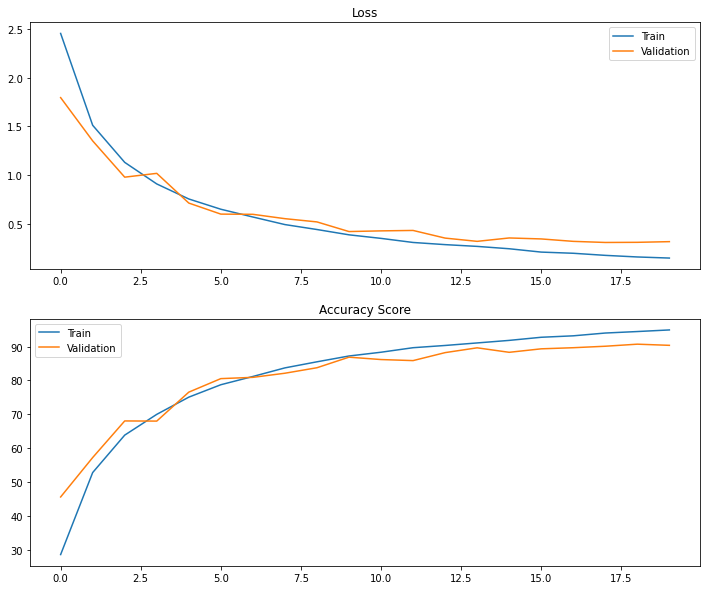

In [31]:
fig, ax = plt.subplots(2, 1, figsize=(12, 10))
ax = ax.flatten()

ax[0].plot(train_loss_history, label="Train")
ax[0].plot(val_loss_history, label="Validation")
ax[0].title.set_text("Loss")
ax[0].legend()

ax[1].plot(train_accuracy_history, label="Train")
ax[1].plot(val_accuracy_history, label="Validation")
ax[1].title.set_text("Accuracy Score")
ax[1].legend()

plt.show()

In [42]:
def test_model():
    model = NeuralNetwork()
    # model.fc = nn.Linear(in_features=512, out_features=27)
    model = model.to(device)
    path = "/content/drive/MyDrive/Colab Notebooks/model.pth"
    model.load_state_dict(torch.load(path))
    model.eval()
    
    running_accuracy = 0
    total = 0
    all_predictions = []
    
    with torch.no_grad():
        for data in test_dataloader:
            inputs, outputs = data
            inputs, outputs = inputs.to(device), outputs.to(device)
            outputs = outputs.to(torch.float32)
            predictions = model(inputs)
            _, predicted = torch.max(predictions, 1)
            total += outputs.size(0)
            running_accuracy += (predicted == outputs).sum().item()
            accuracy = 100*running_accuracy/total
            
            all_predictions.append(list(predicted.to("cpu").numpy()))
        print("Test Accuracy: ", accuracy)
    return np.hstack(all_predictions) # returns a flattened array of batches of predictions

In [43]:
test_model()

Test Accuracy:  90.23255813953489


array([ 0, 11,  0, ..., 26, 26, 26])

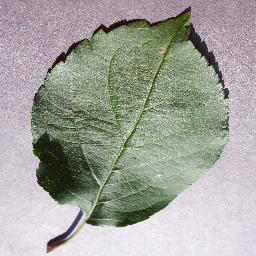

Apple___healthy


In [53]:
path = "/content/splitted_data/test/Apple___healthy/0793dfa6-3728-409b-a5dc-7f3c07528dde___RS_HL 7379.JPG"
img = Image.open(path)
img_transform = test_transform(img).unsqueeze(0)
img_transform = img_transform.to(device)
out = model(img_transform).argmax()
img.show()
print(labels_for_viz[out.item()])